In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import datetime as dt


In [30]:
data=pd.read_csv('/content/drive/My Drive/dataset.csv')
data

,title,score,id,url,comms_num,body,flair,timestamp
0,"Only In India, Supporters of a Political Party...",1363,he9ue7,https://www.reddit.com/r/india/comments/he9ue7...,106,This started happening the night Prime Ministe...,0.0,2020-06-23 15:01:25
1,Pakistani here Political differences aside I c...,687,gonog2,https://i.redd.it/t82v0lnspc051.jpg,235,NaN,0.0,2020-05-23 01:28:06
2,Younger Indians more worried about the governm...,280,hgtuxv,https://www.livemint.com/news/india/younger-in...,23,NaN,0.0,2020-06-27 21:51:51
3,Which movies would not have been allowed to re...,202,h028ri,https://www.reddit.com/r/india/comments/h028ri...,103,"A few on top of my mind are PK, Rang De Basant...",0.0,2020-06-10 10:45:56
4,Congress drops Sanjay Jha as party spokesperso...,219,hatke2,https://twitter.com/the_hindu/status/127327530...,38,NaN,0.0,2020-06-17 23:38:29
...,...,...,...,...,...,...,...,...
3021,AMA Announcement: Sanjeev Sabhlok from the Swa...,22,9mxnv9,https://www.reddit.com/r/india/comments/9mxnv9...,0,"Hi /r/india, \n\nMr. Sanjeev Sabhlok, a former...",9.0,2018-10-10 16:32:18
3022,"[NP] r/India, what's bothering you? I'm here t...",27,4rhdqd,https://www.reddit.com/r/india/comments/4rhdqd...,178,Let's hear it.,9.0,2016-07-06 15:35:35
3023,"Hi r/India, I am Kumaran Mahalingam, a Geologi...",111,5szty8,https://www.reddit.com/r/india/comments/5szty8...,40,I'm a Geologist passionate about Standup-Paddl...,9.0,2017-02-09 20:58:51
3024,r/IndiaInvestments is having an AMA with Gaura...,17,8hy5eh,https://www.reddit.com/r/india/comments/8hy5eh...,6,https://np.reddit.com/r/IndiaInvestments/comme...,9.0,2018-05-09 00:40:36


In [31]:
data.body.fillna('', inplace=True)

Text(0, 0.5, 'Number of posts')

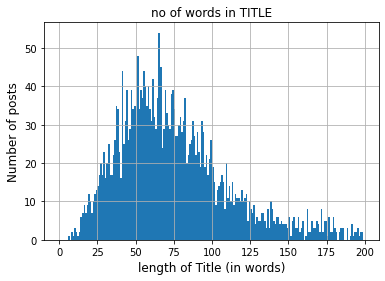

In [17]:
# distribution of no of words in title

temp = data.title.str.len()
temp.hist(bins = np.arange(0,200,1))
plt.title("no of words in TITLE")
plt.xlabel("length of Title (in words)", fontsize=12)
plt.ylabel("Number of posts", fontsize=12)

Text(0, 0.5, 'Number of posts')

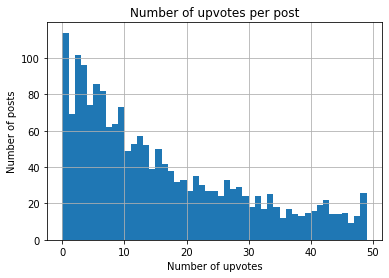

In [18]:
temp = data.score
temp.hist(bins = np.arange(0,50,1))
plt.title("Number of upvotes per post")
plt.xlabel("Number of upvotes")
plt.ylabel("Number of posts")

Text(0, 0.5, 'Number of posts')

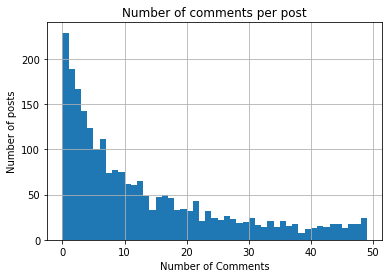

In [19]:
temp = data.comms_num
temp.hist(bins = np.arange(0,50,1))


plt.title("Number of comments per post")
plt.xlabel("Number of Comments")
plt.ylabel("Number of posts")

In [20]:
data = data.sample(frac=1).reset_index(drop=True)

In [32]:
fig = px.histogram(data, x="timestamp")
fig.show()

,comms_num
flair,
0.0,60.466513
1.0,18.158140
2.0,116.839695
3.0,205.609562
4.0,45.646048
5.0,33.303030
6.0,25.155378
7.0,45.831643
8.0,22.907489


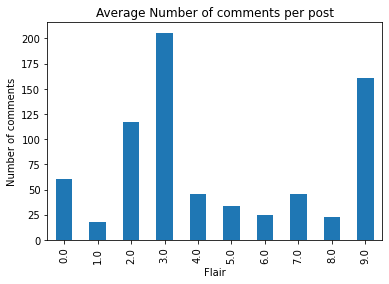

In [29]:
table = data.groupby("flair").mean()[['comms_num']]

table.plot(kind='bar', legend=False, grid=False)
plt.title("Average Number of comments per post")
plt.xlabel("Flair")
plt.ylabel("Number of comments")


table.head(10)

In [184]:
data = data.set_index('timestamp')

Text(0, 0.5, 'Number of comments')

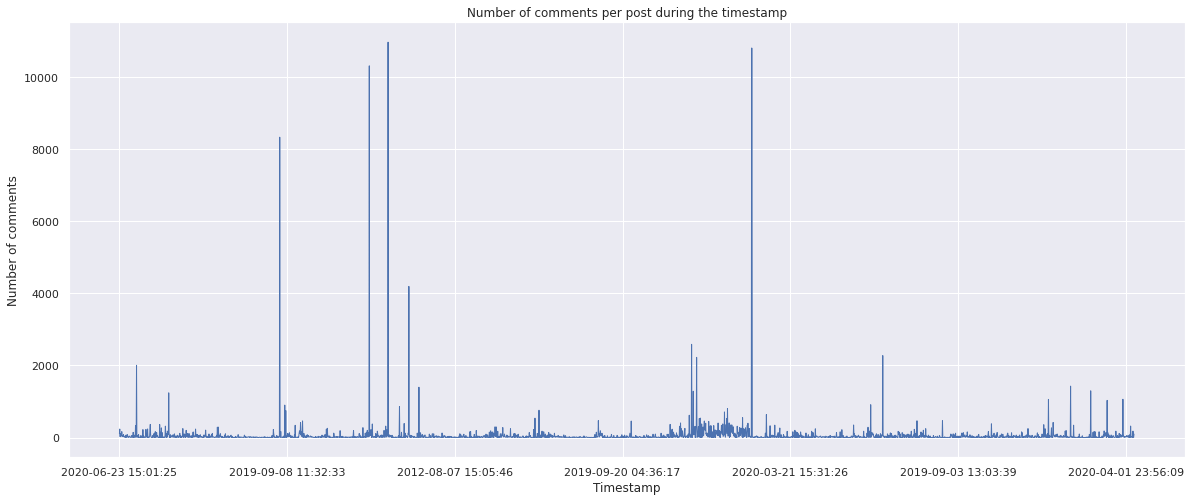

In [185]:
sns.set(rc={'figure.figsize':(20, 8)})

data['comms_num'].plot(linewidth=1);


plt.title("Number of comments per post during the timestamp")
plt.xlabel("Timestamp")
plt.ylabel("Number of comments")


In [186]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [189]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

In [194]:
def make_wordcloud(col):
    print('Creating wordcloud...')
    contentCorpus = col.values
    wordcloud = WordCloud(width = 3000, height = 2000, max_words=1000,random_state=1, stopwords=stop_words, collocations=False).generate(str(contentCorpus))
    fig = plt.figure(figsize = (10, 8))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

Creating wordcloud...


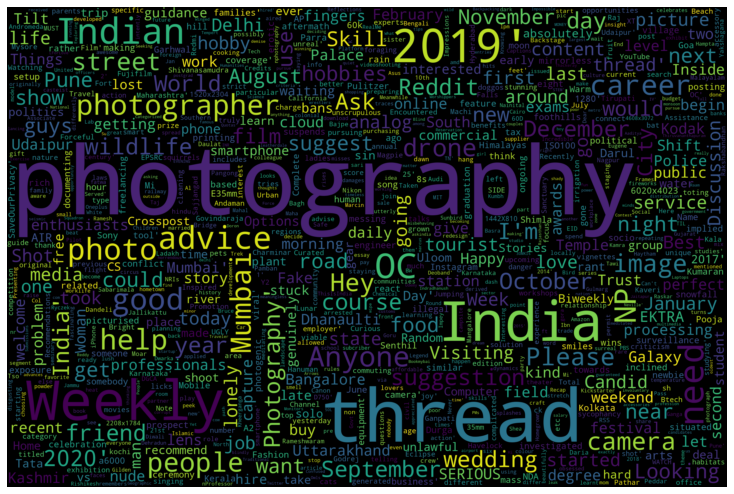

In [196]:
make_wordcloud(data['title'][data.flair == 8])

Creating wordcloud...


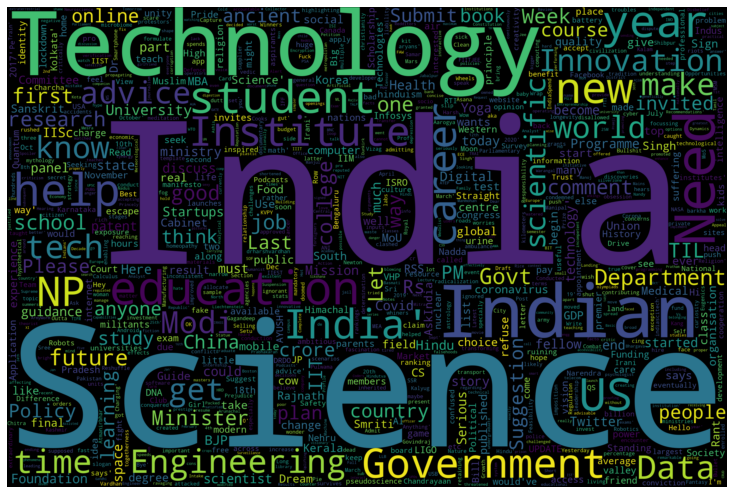

In [198]:
make_wordcloud(data['title'][data.flair == 4])